In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import argparse
import histlite as hl
import csky as cy

#Building/loading MESC data from analysis directory
ana_dir = cy.utils.ensure_dir('/data/user/mkovacevich/FRB_analysis/cascades_ana')
repo = cy.selections.Repository()
ana = cy.analysis.Analysis(repo, cy.selections.MESEDataSpecs.mesc_7yr, dir=ana_dir, compress = False)

cy.plotting.mrichman_mpl()
%matplotlib inline

/home/mkovacevich/py3venv/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

/home/mkovacevich/py3venv/lib/python3.7/site-packages/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


In [2]:
a = ana[0]
data, sig = a.data, a.sig

/home/mkovacevich/py3venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


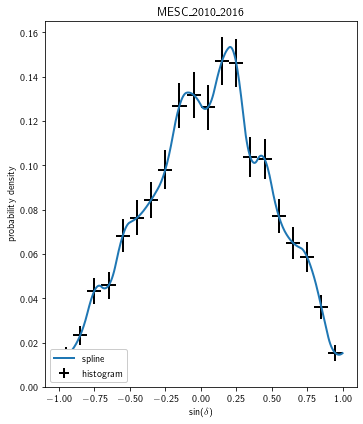

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
axs = np.ravel(axs)
for (i, a) in enumerate(ana):
    ax = axs[i]
    hl.plot1d (ax, a.bg_space_param.h, crosses=True, color='k', label='histogram')
    sd = np.linspace (-1, 1, 300)
    ax.plot (sd, a.bg_space_param(sindec=sd), label='spline')
    ax.set_ylim(0)
    ax.set_title(a.plot_key)
    ax.set_xlabel(r'$\sin(\delta)$')
    ax.set_ylabel(r'probability density')
axs[0].legend(loc='lower left')
plt.tight_layout()
axs[-1].set_visible(False)

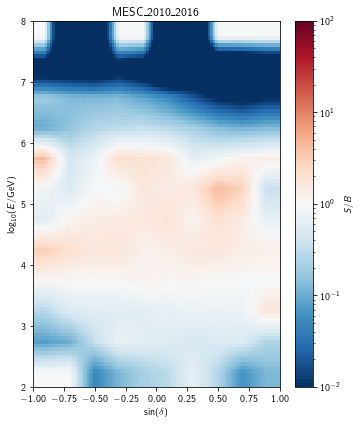

In [4]:
gamma = 3
fig, axs = plt.subplots(1, 2, figsize=(10,6))
axs = np.ravel(axs)
for (i, a) in enumerate(ana):
    ax = axs[i]
    eprm = a.energy_pdf_ratio_model
    ss = dict(zip(eprm.gammas, eprm.ss_hl))
    things = hl.plot2d(ax, ss[gamma].eval(bins=100),
                       vmin=1e-2, vmax=1e2, log=True, cbar=True, cmap='RdBu_r')
    ax.set_title(a.plot_key)
    things['colorbar'].set_label(r'$S/B$')
    ax.set_xlabel(r'$\sin(\delta)$')
    ax.set_ylabel(r'$\log_{10}(E/\text{GeV})$')
plt.tight_layout()
axs[-1].set_visible(False)

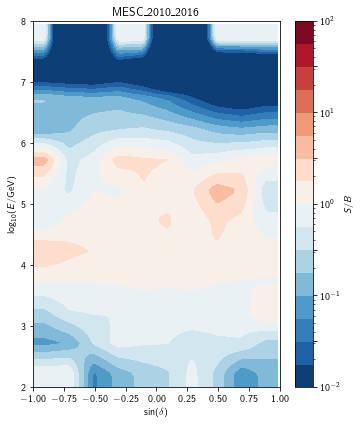

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
axs = np.ravel(axs)
for (i, a) in enumerate(ana):
    ax = axs[i]
    eprm = a.energy_pdf_ratio_model
    ss = dict(zip(eprm.gammas, eprm.ss_hl))
    things = hl.plot2d(ax, ss[gamma].eval(bins=100),
                       levels=np.logspace(-2, 2, 16+1),
                       vmin=1e-2, vmax=1e2, log=True, cbar=True, cmap='RdBu_r')
    ax.set_title(a.plot_key)
    things['colorbar'].set_label(r'$S/B$')
    ax.set_xlabel(r'$\sin(\delta)$')
    ax.set_ylabel(r'$\log_{10}(E/\text{GeV})$')
plt.tight_layout()
axs[-1].set_visible(False)

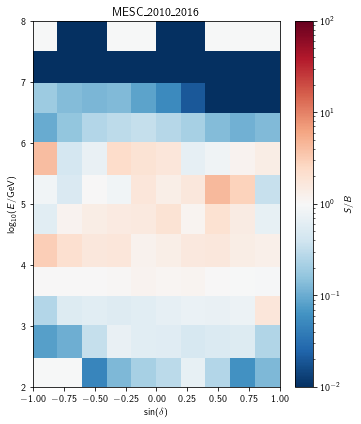

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
axs = np.ravel(axs)
for (i, a) in enumerate(ana):
    ax = axs[i]
    eprm = a.energy_pdf_ratio_model
    hs_ratio = dict(zip(eprm.gammas, eprm.hs_ratio))
    things = hl.plot2d(ax, hs_ratio[gamma].eval(bins=100),
                       vmin=1e-2, vmax=1e2, log=True, cbar=True, cmap='RdBu_r')
    ax.set_title(a.plot_key)
    things['colorbar'].set_label(r'$S/B$')
    ax.set_xlabel(r'$\sin(\delta)$')
    ax.set_ylabel(r'$\log_{10}(E/\text{GeV})$')
plt.tight_layout()
axs[-1].set_visible(False)

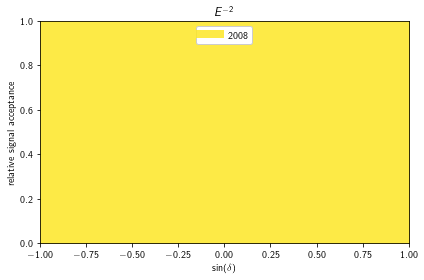

In [7]:
def acc_to_hist (a, gamma=2, n_sindec=100):
    kw = dict (bins=(1,n_sindec), range=((gamma-.25,gamma+.25), (-1,1)))
    return a.acc_param.s_hl.eval(**kw)[gamma] * a.livetime

fig, ax = plt.subplots()
gamma = 2
hs = np.array([acc_to_hist(a, gamma=gamma) for a in ana.anas])
shs = np.sum(hs, axis=0)
cm = plt.get_cmap('viridis')
colors = [cm(1 - 1. * i / len(hs)) for i in range(len(hs))]
labels = '2008 2009 2010 2011 2012--2014'.split()
hl.stack1d(ax, hs / shs, labels=labels, colors=colors, alpha=.85)
ax.legend(loc='upper center', ncol=3)
ax.set_xlabel(r'$\sin(\delta)$')
ax.set_ylabel(r'relative signal acceptance')
ax.set_title(r'$E^{{-{}}}$'.format(gamma))
ax.set_xlim(-1, 1)
ax.set_ylim(0, 1)
plt.tight_layout()

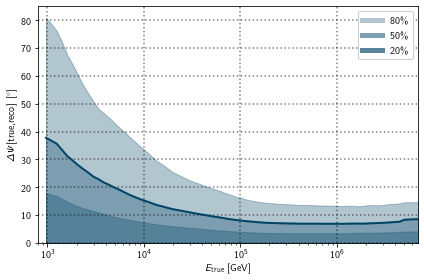

In [8]:
akw = dict (bins=(15,10**4), range=((.8e3, 1e7), (0, 180)), log=(True,False))
h = hl.hist_slide ((5,1), (sig.true_energy, np.degrees (sig.dpsi)), sig.oneweight*sig.true_energy**-2, **akw)

# normalize along the angular error axis
h = h.normalize(1)
# get 20%, 50%, and 80% quantiles
h2 = h.contain(1, .2)
h5 = h.contain(1, .5)
h8 = h.contain(1, .8)

soft_colors = cy.plotting.soft_colors
soft_colors

fig, ax = plt.subplots()

# plot quantiles, emphasize median
color = soft_colors[0]
hl.fill_between(ax, 0, h2, color=color, alpha=.3, drawstyle='line')
hl.fill_between(ax, 0, h5, color=color, alpha=.3, drawstyle='line')
hl.fill_between(ax, 0, h8, color=color, alpha=.3, drawstyle='line')
hl.plot1d (ax, h5, color=color, lw=2, drawstyle='default')

# trick to get the legend handles colored right
# try testing what happens if you just do hl.fill_between(..., label='...')
nans = [np.nan, np.nan]
ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.3)**1, label='80\%')
ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.3)**2, label='50\%')
ax.plot (nans, nans, color=color, lw=5, alpha=1 - (1-0.3)**3, label='20\%')

# labels etc
ax.semilogx()
ax.set_xlabel(r'$E_\text{true}$ [GeV]')
ax.set_ylabel(r'$\Delta\Psi[\text{true,reco}]~[^\circ]$')
ax.set_xlim(h.bins[0][0], h.bins[0][-2])
ax.set_ylim(0)
ax.grid(alpha = .5, color = 'black', lw = 1.5)
ax.legend(loc='upper right')
plt.tight_layout()
fig.savefig('/home/mkovacevich/public_html/Qual/MESC_AngularResolution.png', bbox_inches='tight')